In [29]:
import pandas as pd

In [30]:
ab_data = pd.read_csv('ab_data.csv')
print(len(ab_data))
ab_data.head()

294478


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [31]:
pd.crosstab(ab_data['landing_page'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
landing_page,,,
new_page,0.440580,0.059420,0.5
old_page,0.439761,0.060239,0.5
All,0.880341,0.119659,1.0


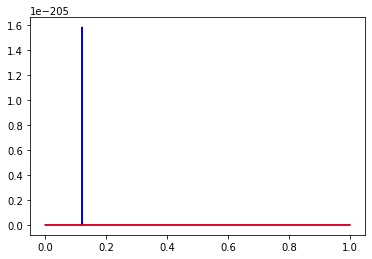

In [32]:
from statistics import mean
import numpy as np
p_0 = mean(ab_data[ab_data['landing_page'] == 'old_page']['converted'])
p_1 = mean(ab_data[ab_data['landing_page'] == 'new_page']['converted'])
sd_0 = p_0 * (1 - p_0) / len(ab_data[ab_data['landing_page'] == 'old_page'])
sd_1 = p_1 * (1 - p_1) / len(ab_data[ab_data['landing_page'] == 'new_page'])
import matplotlib.pyplot as plt 
from scipy.stats import norm 
x_axis = np.arange(0, 1, 0.0001) 
plt.plot(x_axis, norm.pdf(x_axis, p_0, sd_0), color='blue') 
plt.plot(x_axis, norm.pdf(x_axis, p_1, sd_1), color='red') 

In [33]:
print(p_0, sd_0)
print(p_1, sd_1)

0.12047759085568362 7.196649050679107e-07
0.11884079625642663 7.112087246012613e-07


In [34]:
total = len(ab_data)
p_converted_g_new_page = 17498  / len(ab_data[ab_data['landing_page'] == 'new_page'])
p_converted_g_old_page = 17739 / len(ab_data[ab_data['landing_page'] == 'old_page'])
p_new_page = len(ab_data[ab_data['landing_page'] == 'new_page']) / len(ab_data)
p_old_page = len(ab_data[ab_data['landing_page'] == 'old_page']) / len(ab_data)
p_converted = sum(ab_data['converted']) / len(ab_data)
print("Probability of conversion given new page: ", p_converted_g_new_page)
print("Probability of conversion given old page: ", p_converted_g_old_page)
print("Probability of new page: ", p_new_page)
print("Probability of old page: ", p_old_page)
print("Probability of conversion: ", sum(ab_data['converted']) / len(ab_data))

Probability of conversion given new page:  0.11884079625642663
Probability of conversion given old page:  0.12047759085568362
Probability of new page:  0.5
Probability of old page:  0.5
Probability of conversion:  0.11965919355605512


In [35]:
pd.crosstab(ab_data['group'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
group,,,
control,0.439690,0.060184,0.499874
treatment,0.440651,0.059475,0.500126
All,0.880341,0.119659,1.000000


In [36]:
pd.crosstab(ab_data['group'], ab_data['landing_page'], margins = True, normalize=True)

landing_page,new_page,old_page,All
group,,,
control,0.006547,0.493327,0.499874
treatment,0.493453,0.006673,0.500126
All,0.500000,0.500000,1.000000


In [37]:
control = ab_data[ab_data['group'] == 'control']
treat = ab_data[ab_data['group'] == 'treatment']
treat

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


We would like to assume that the new page as a higher conversion rate than the old page, so we supposed H_0: p_new_page > p_old_page vs. H_1: p_new_page <= p_old_page. 

In [43]:
import random
def generate(p_new, p_conv_old, p_conv_new, iterations):
    df = []
    timeline = []
    total_new = 0
    total_old = 0
    new_conv = 0
    old_conv = 0
    llh_conv_new = 1
    llh_conv_old = 1
    for i in range(iterations):
        if random.uniform(0,1) <= p_new:
            if random.uniform(0,1) <= p_conv_new:
                df.append(pd.DataFrame({
                    "landing_page" : ['new'],
                    'converted' : [1]
                }))
                new_conv += 1
                llh_conv_new *= p_conv_new
            else:
                df.append(pd.DataFrame({
                    "landing_page" : ['new'],
                    'converted' : [0]
                }))
                llh_conv_new *= (1 - p_conv_new)
            total_new += 1
        else:
            if random.uniform(0,1) <= p_conv_old:
                df.append(pd.DataFrame({
                    "landing_page" : ['old'],
                    'converted' : [1]
                }))
                old_conv += 1
                llh_conv_old *= p_conv_old
            else:
                df.append(pd.DataFrame({
                    "landing_page" : ['old'],
                    'converted' : [0]
                }))
                llh_conv_old *= (1 - p_conv_old)
            total_old += 1
            
        if total_new == 0:
            test_prop_new = 0
        else:
            test_prop_new = new_conv / total_new
            
        if total_old == 0:
            test_prop_old = 0
        else:
            test_prop_old = old_conv / total_old
            
        timeline.append(pd.DataFrame({
            'conversion_rate_new_page' : [test_prop_new],
            'conversion_rate_old_page' : [test_prop_old],
            'iteration' : [i]
        }))
    return pd.concat(df, ignore_index=True), pd.concat(timeline, ignore_index=True), llh_conv_new, llh_conv_old

import scipy.stats
def get_prior(p, alpha, beta):
    return p ** (alpha - 1) * (1 - p) ** (beta - 1) / scipy.stats.beta.pdf()

def get_posterior(data, page_type, p):
    y = len(data[(data['landing_page'] == page_type) & (data['converted'] == 1)])
    n = len(data[data['landing_page'] == page_type])
    return (p ** n) * (1 - p) ** (n - y)

llh_conv_new :6.02944949378254e-08 llh_conv_old :0.002719843593643743


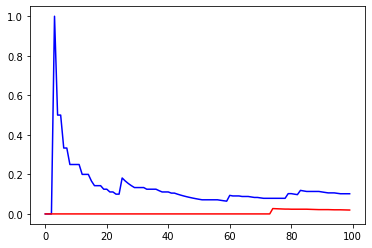

In [39]:
import matplotlib.pyplot as plt
df, timeline, llh_conv_new, llh_conv_old = generate(0.5, 0.06, 0.065, 100)
print("llh_conv_new :" + str(llh_conv_new) + " llh_conv_old :" + str(llh_conv_old))
plt.plot(timeline['iteration'], timeline['conversion_rate_new_page'], color='blue')
plt.plot(timeline['iteration'], timeline['conversion_rate_old_page'], color='red')
plt.show()